In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from hmmlearn import hmm
from IOHMM_v2 import IOHMM_model

In [2]:
# Generate data
hmm_model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100)
hmm_model.startprob_ = np.array([0.0, 1.0])
hmm_model.transmat_ = np.array([[0.9, 0.1],
                                [0.1, 0.9]])
hmm_model.means_ = np.array([[-10.0], [10.0]])
hmm_model.covars_ = np.array([[.1], [.1]])
# Sample data
X, Z = hmm_model.sample(20)
# Dataframe
data = pd.DataFrame(X, columns=['X'])
data['Z'] = Z

output = torch.tensor(data['X'].values, dtype=torch.float32)
input = torch.ones(output.size(), dtype=torch.float32).unsqueeze(1)

In [3]:
print(data)

            X  Z
0   10.644509  1
1    9.871954  1
2    9.906780  1
3   10.505828  1
4   10.093274  1
5    9.569240  1
6   10.003793  1
7  -10.074151  0
8   -9.824229  0
9   -9.323864  0
10 -10.044737  0
11 -10.080486  0
12  -9.859216  0
13  -9.876259  0
14 -10.469950  0
15 -10.067645  0
16 -10.309449  0
17  -9.924391  0
18   9.959576  1
19  10.010201  1


In [4]:
print("Input size:", input.size())
print("Output size:", output.size())

Input size: torch.Size([20, 1])
Output size: torch.Size([20])


In [5]:
iohmm = IOHMM_model(num_states=2, inputs=input, outputs=output, max_iter=50, tol=1e-40)

In [6]:
print("Initial parameters:")
print(f"Theta transition:{iohmm.theta_transition}")
print(f"Theta emission:{iohmm.theta_emission}")

Initial parameters:
Theta transition:Parameter containing:
tensor([[[ 0.1351, -1.3736],
         [ 2.2021,  0.0974]],

        [[-0.8533,  1.2857],
         [-1.8434, -0.4740]]], requires_grad=True)
Theta emission:Parameter containing:
tensor([[ 0.4004, -0.4541],
        [ 2.0007, -0.4081]], requires_grad=True)


In [7]:
iohmm.baum_welch()

iteration 0
old likelihood: -inf
iteration 1
old likelihood: tensor([[-180.8919]])
iteration 2
old likelihood: tensor([[-135.9278]])
iteration 3
old likelihood: tensor([[-95.8269]])
iteration 4
old likelihood: tensor([[-83.1459]])
iteration 5
old likelihood: tensor([[-120.4428]])
iteration 6
old likelihood: tensor([[-109.6203]])
iteration 7
old likelihood: tensor([[-125.3444]])
iteration 8
old likelihood: tensor([[-110.7951]])
iteration 9
old likelihood: tensor([[-132.7983]])
iteration 10
old likelihood: tensor([[-122.7702]])
iteration 11
old likelihood: tensor([[-155.8031]])
iteration 12
old likelihood: tensor([[-123.9072]])
iteration 13
old likelihood: tensor([[-109.3764]])
iteration 14
old likelihood: tensor([[-92.0472]])
iteration 15
old likelihood: tensor([[-131.0994]])
iteration 16
old likelihood: tensor([[-143.4365]])
iteration 17
old likelihood: tensor([[-100.4427]])
iteration 18
old likelihood: tensor([[-75.8502]])
iteration 19
old likelihood: tensor([[-83.3827]])
iteration 20

In [8]:
print("Final parameters:")
print(f"Theta transition:{iohmm.theta_transition}")
print(f"Theta emission:{iohmm.theta_emission}")

Final parameters:
Theta transition:Parameter containing:
tensor([[[-1.4856, -2.9943],
         [ 3.1901,  1.0854]],

        [[ 0.7674,  2.9064],
         [-2.8314, -1.4620]]], requires_grad=True)
Theta emission:Parameter containing:
tensor([[-0.4187, -1.2732],
        [ 1.0063, -1.4025]], requires_grad=True)


[-inf, tensor([[-180.8919]]), tensor([[-135.9278]]), tensor([[-95.8269]]), tensor([[-83.1459]]), tensor([[-120.4428]]), tensor([[-109.6203]]), tensor([[-125.3444]]), tensor([[-110.7951]]), tensor([[-132.7983]]), tensor([[-122.7702]]), tensor([[-155.8031]]), tensor([[-123.9072]]), tensor([[-109.3764]]), tensor([[-92.0472]]), tensor([[-131.0994]]), tensor([[-143.4365]]), tensor([[-100.4427]]), tensor([[-75.8502]]), tensor([[-83.3827]]), tensor([[-79.4189]]), tensor([[-105.3370]]), tensor([[-92.2505]]), tensor([[-140.6469]]), tensor([[-152.8446]]), tensor([[-111.0008]]), tensor([[-76.3892]]), tensor([[-87.9694]]), tensor([[-156.1718]]), tensor([[-116.2031]]), tensor([[-81.8835]]), tensor([[-80.7062]]), tensor([[-113.2818]]), tensor([[-96.5625]]), tensor([[-98.5956]]), tensor([[-84.6028]]), tensor([[-122.0493]]), tensor([[-150.8139]]), tensor([[-115.2642]]), tensor([[-96.7845]]), tensor([[-93.3127]]), tensor([[-83.6689]]), tensor([[-126.8991]]), tensor([[-128.2295]]), tensor([[-88.2022]]),

/tmp/ipykernel_25615/4278840530.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  history = [float(h.numpy()) if torch.is_tensor(h) else float(h) for h in iohmm.history]


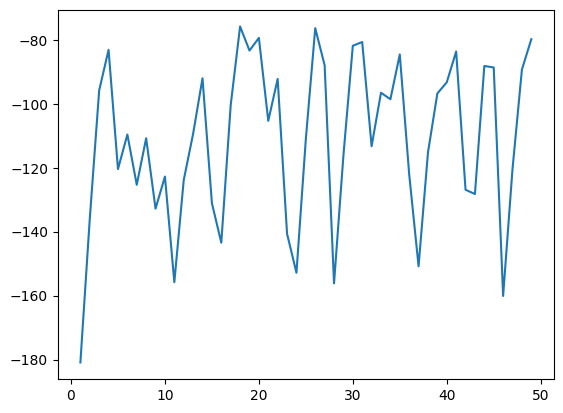

In [9]:
print(iohmm.history)

# Convert tensors to floats
history = [float(h.numpy()) if torch.is_tensor(h) else float(h) for h in iohmm.history]

# Plot the history
plt.plot(history)

In [12]:
iohmm.viterbi()

tensor([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

State 0 distribution:
Mean: -1.6918299198150635
Standard deviation: 4.699399948120117




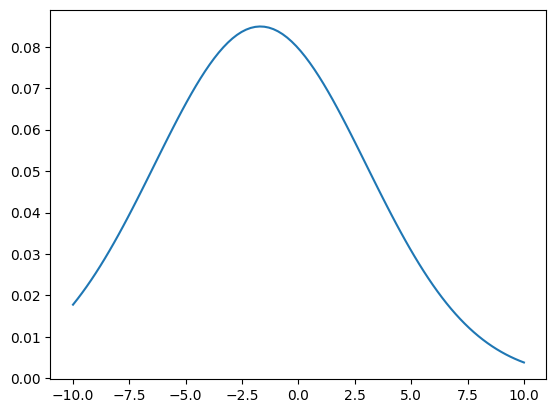

State 1 distribution:
Mean: -0.39614391326904297
Standard deviation: 12.045048713684082




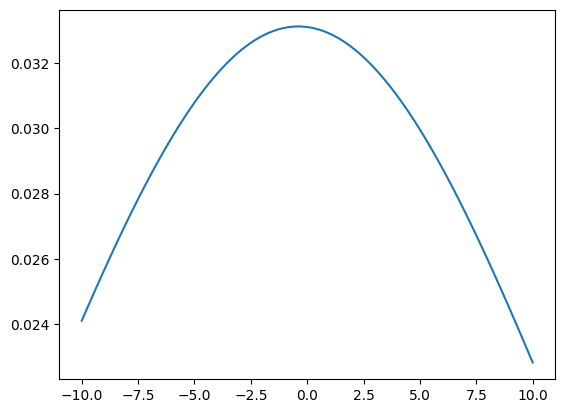

In [11]:
iohmm.plot_state_distribution()